<a href="https://colab.research.google.com/github/Noriega20310003/Prosesamiento-de-autos/blob/main/ProcesamientoAutos_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import statistics as stat
import seaborn as sns

url = "/content/autos.csv"
df = pd.read_csv(url,header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,symbol,loss,make,fuel,aspir,doors,style,drive,eng_loc,wb,...,eng_cc,fuel.sys,bore,stroke,comp.ratio,hp,rpm,city_mpg,hw_mpg,price
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950


In [ ]:
df.drop([0], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head(5)
headers = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style',
           'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
           'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore','stroke', 'compression_ratio',
           'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

In [ ]:
df.columns = headers
df.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8,115,5500,18,22,17450


In [ ]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8,115,5500,18,22,17450


In [ ]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

symboling
False    205
Name: symboling, dtype: int64

normalized_losses
False    164
True      41
Name: normalized_losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel_type
False    205
Name: fuel_type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num_doors
False    203
True       2
Name: num_doors, dtype: int64

body_style
False    205
Name: body_style, dtype: int64

drive_wheels
False    205
Name: drive_wheels, dtype: int64

engine_location
False    205
Name: engine_location, dtype: int64

wheel_base
False    205
Name: wheel_base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb_weight
False    205
Name: curb_weight, dtype: int64

engine_type
False    205
Name: engine_type, dtype: int64

num_cylinders
False    205
Name: num_cylinders, dtype: int64

engine_size
False    205
Name: engine_size, dtype: int64

fuel_system
False    205
N

In [ ]:
avg_norm_loss = df["normalized_losses"].astype("float").mean(axis=0)
print("Average of normalizad-losses:", avg_norm_loss)

Average of normalizad-losses: 122.0


In [ ]:
df["normalized_losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [ ]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [ ]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [ ]:
avg_stroke=df['stroke'].astype('float').mean(axis=0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


In [ ]:
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

In [ ]:
avg_horsepower=df['horsepower'].astype('float').mean(axis=0)
print("Average of horsepower:", avg_horsepower)

Average of horsepower: 104.25615763546799


In [ ]:
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)

In [ ]:
avg_peakrpm=df['peak_rpm'].astype('float').mean(axis=0)
print("Average of peak rpm:", avg_peakrpm)

Average of peak rpm: 5125.369458128079


In [ ]:
df["peak_rpm"].replace(np.nan, avg_horsepower, inplace=True)

In [ ]:
df['num_doors'].value_counts().idxmax()

'four'

In [ ]:
df['num_doors'].replace(np.nan, "four", inplace=True)

In [ ]:
df.dropna(subset=["price"], axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8,115,5500,18,22,17450


In [ ]:
df.dtypes

symboling            object
normalized_losses    object
make                 object
fuel_type            object
aspiration           object
num_doors            object
body_style           object
drive_wheels         object
engine_location      object
wheel_base           object
length               object
width                object
height               object
curb_weight          object
engine_type          object
num_cylinders        object
engine_size          object
fuel_system          object
bore                 object
stroke               object
compression_ratio    object
horsepower           object
peak_rpm             object
city_mpg             object
highway_mpg          object
price                object
dtype: object

In [ ]:
df[["bore", "stroke"]] = df[["bore" , "stroke"]].astype("float")
df[["normalized_losses"]] = df[["normalized_losses"]].astype("int")
df[["price"]] = df[["price"]].astype("int")
df[["peak_rpm"]] = df[["peak_rpm"]].astype("float")
df[["city_mpg"]] = df[["city_mpg"]].astype("int")
df[["highway_mpg"]] = df[["highway_mpg"]].astype("int")
df[["length", "width", "height"]] = df[["length", "width", "height"]].astype("float")

In [ ]:
df.dtypes

symboling             object
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base            object
length               float64
width                float64
height               float64
curb_weight           object
engine_type           object
num_cylinders         object
engine_size           object
fuel_system           object
bore                 float64
stroke               float64
compression_ratio     object
horsepower            object
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [ ]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500.0,18,22,17450


In [ ]:
df['city-L/100km'] = 235/df["city_mpg"]
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9,111,5000.0,21,27,13495,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9,111,5000.0,21,27,16500,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9,154,5000.0,19,26,16500,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10,102,5500.0,24,30,13950,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8,115,5500.0,18,22,17450,13.055556


In [ ]:
df["highway_mpg"]= 235/df["highway_mpg"]
df.rename(columns={'"highway_mpg"':'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9,111,5000.0,21,8.703704,13495,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9,111,5000.0,21,8.703704,16500,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9,154,5000.0,19,9.038462,16500,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10,102,5500.0,24,7.833333,13950,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8,115,5500.0,18,10.681818,17450,13.055556


In [ ]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [ ]:
df['height'] = df['height']/df['width'].max()
df[["length", "width", "height"]].head()

,length,width,height
0,0.811148,0.890278,48.8
1,0.811148,0.890278,48.8
2,0.822681,0.909722,52.4
3,0.848630,0.919444,54.3
4,0.848630,0.922222,54.3


In [ ]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'city-L/100km'],
      dtype='object')

In [ ]:
dummy_variable_1=pd.get_dummies(df['fuel_type'])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
dummy_variable_1.rename(columns={'gas': 'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
df=pd.concat([df, dummy_variable_1], axis=1)
df.drop("fuel_type", axis = 1, inplace=True)

In [ ]:
df.head()

,symboling,normalized_losses,make,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9,111,5000.0,21,8.703704,13495,11.190476,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9,111,5000.0,21,8.703704,16500,11.190476,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9,154,5000.0,19,9.038462,16500,12.368421,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10,102,5500.0,24,7.833333,13950,9.791667,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8,115,5500.0,18,10.681818,17450,13.055556,0,1


In [ ]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
df=pd.concat([df, dummy_variable_2], axis=1)
df.drop('aspiration', axis = 1, inplace=True)

In [ ]:
df.to_csv('clean_df.csv')

<Axes: xlabel='body_style', ylabel='price'>

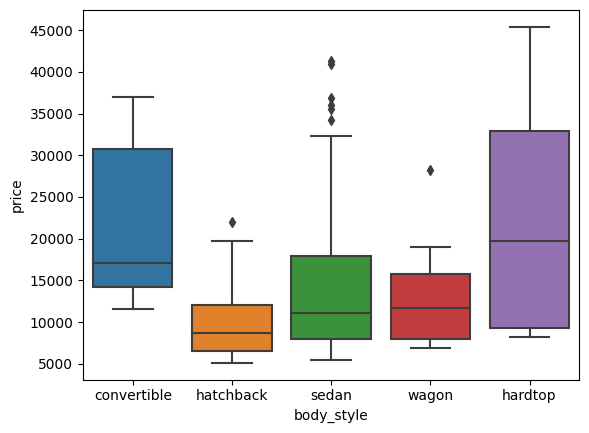

In [ ]:
sns.boxplot(x="body_style", y="price", data=df)

<Axes: xlabel='engine_location', ylabel='price'>

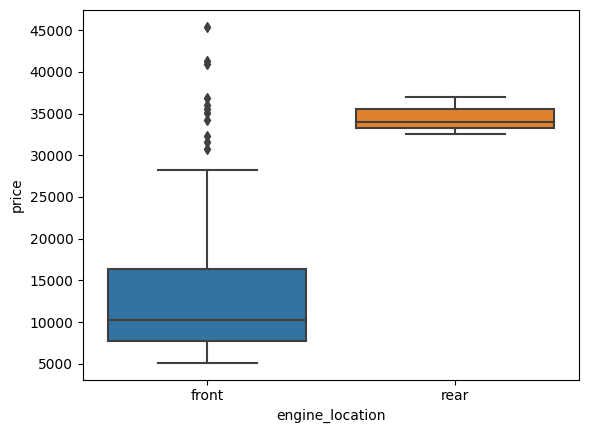

In [ ]:
sns.boxplot(x="engine_location", y="price", data=df)

<Axes: xlabel='drive_wheels', ylabel='price'>

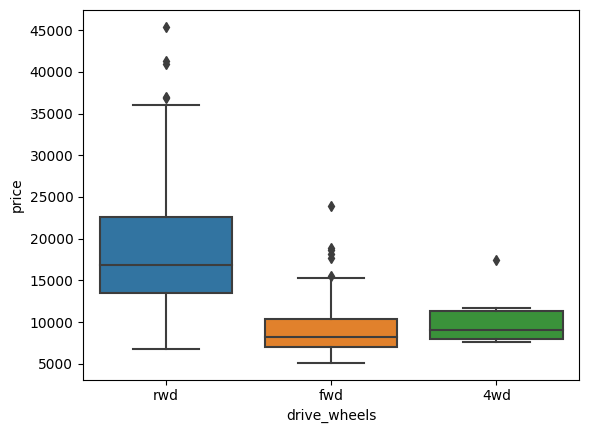

In [ ]:
sns.boxplot(x="drive_wheels", y="price", data=df)

In [ ]:
df.describe()

,normalized_losses,length,width,height,bore,stroke,peak_rpm,city_mpg,highway_mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,122.00000,0.837102,0.915126,53.766667,3.330692,3.256874,5067.704041,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,31.99625,0.059213,0.029187,2.447822,0.268072,0.316048,690.960434,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,65.00000,0.678039,0.837500,47.800000,2.540000,2.070000,104.256158,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,101.00000,0.801538,0.890278,52.000000,3.150000,3.110000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,122.00000,0.832292,0.909722,54.100000,3.310000,3.290000,5100.000000,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,137.00000,0.881788,0.925000,55.500000,3.580000,3.410000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,256.00000,1.000000,1.000000,59.800000,3.940000,4.170000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe(include=['object'])

,symboling,make,num_doors,body_style,drive_wheels,engine_location,wheel_base,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,compression_ratio,horsepower
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,6,22,2,5,3,2,52,169,6,7,43,8,32,59
top,0,toyota,four,sedan,fwd,front,93.7,2385,ohc,four,122,mpfi,9,68
freq,65,32,115,94,118,198,20,4,145,157,15,92,46,19


In [ ]:
df['drive_wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: int64

In [ ]:
df['drive_wheels'].value_counts().to_frame()

,drive_wheels
fwd,118
rwd,75
4wd,8


In [ ]:
drive_wheels_counts = df['drive_wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive_wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [ ]:
engine_location_counts = df['engine_location'].value_counts().to_frame()
engine_location_counts.rename(columns={'engine_location': 'value_counts'}, inplace=True)
engine_location_counts.index.name = 'engine_location'
engine_location_counts.head(10)

,value_counts
engine_location,
front,198
rear,3
